In [1]:
import numpy as np
from sklearn.preprocessing import normalize
import os

#Visualizacion
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, transform, exposure

#### Lectura de rostros

In [2]:
icol, irow =(64,64)
dir_ = ('C:/Users/jarroyo/Google Drive/Curso Python Machine Learning/Documentos/MIT/Trabajos/Caso estudio 1.2.1 Reconocimiento de rostros/Rostros')
filenames = os.listdir(dir_)
print('Cantidad de archivos disponibles:{}'.format(len(filenames)))

Cantidad de archivos disponibles:14


In [3]:
M = 14
print('Training set size: {} imagenes'.format(M))

Training set size: 14 imagenes


In [4]:
#Crear lista con nombres de las imagenes
img_name_list = []
for i in range(M):
    img = False
    while not img:
        if filenames[i].find('.jpg') >= 0:
            img_name_list.append(filenames[i])
            img = True
print(img_name_list)

['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [5]:
matriz_img = np.ndarray((icol*irow,M))
matriz_img.shape

(4096, 14)

In [6]:
#Lectura de las imagenes
for i in range(M):
    img = io.imread(dir_+'/{}'.format(img_name_list[i])) #Lectura de imagenes
    img = color.rgb2gray(img) #conversion a gray
    img = transform.resize(img, (icol,irow), anti_aliasing=True)
    matriz_img[:,i] = img.flatten() #Para todas las filas en la columna i dejar la imagen
    

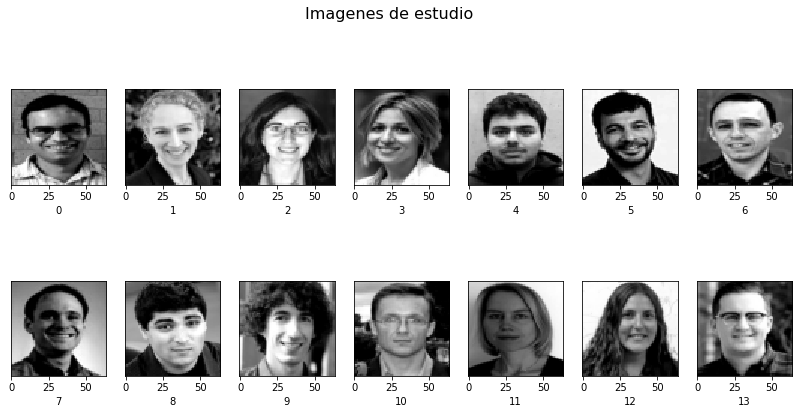

In [35]:
#Visualizacion de rostros
def plot_img(images,title=''):
    images = images[:,:].copy()
    fig, axes = plt.subplots(nrows = round(images.shape[1]/7), ncols=7, figsize = (14,7)) #numero de graficos por columna y filas y su tamaño
    plt.subplots_adjust(wspace = 0.2, hspace= 0.01)
    ax = axes.ravel() #convierte en una sola fila la informacion que recibe axes
    fig.suptitle(title, fontsize = 16, y=0.95)
    for i in range(images.shape[1]):
        #correr hasta 64
        ax[i].imshow(images[:,i].reshape((icol,irow)), cmap='gray')
        ax[i].set_xlabel(i)
        ax[i].get_xaxis().set_visible(True)
        ax[i].get_yaxis().set_visible(False)
    plt.show()

plot_img(matriz_img,title='Imagenes de estudio')

In [8]:
# Guardar imagenes trabajadas
def save_img(images,directory=''):
    for i in range(images.shape[1]):
        io.imsave('Rostros trabajados/{}{}.jpg'.format(directory,i),images[:,i].reshape((icol,irow)))

In [9]:
save_img(matriz_img,directory='')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

# Normalizar imagenes
img_processed = matriz_img.copy()
plot_img(matriz_img,title='Antes de la normalizacion')

media = img_processed.mean(axis=1)
std = img_processed.std(axis=1)

for i in range(M):
    img_processed[:,i] = normalize(img_processed[:,i].reshape(1,-1), norm='l2')

plot_img(img_processed, title='Luego de normalizacion')

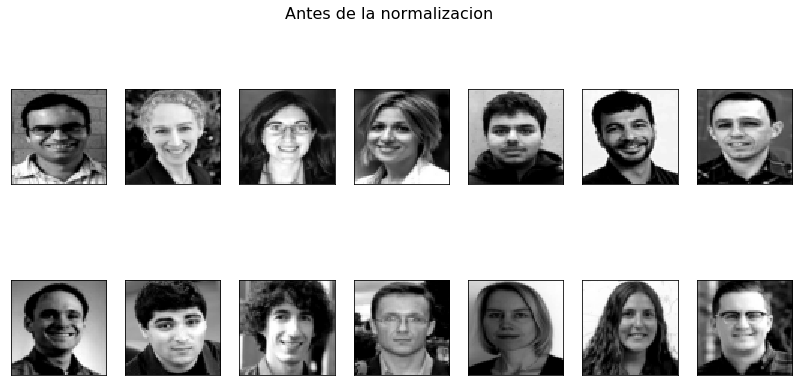

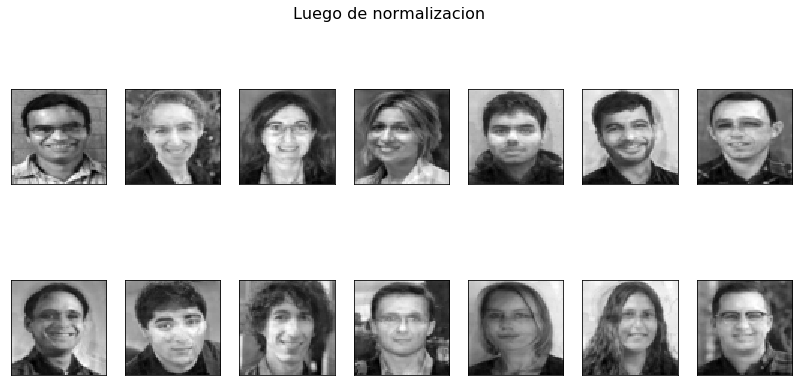

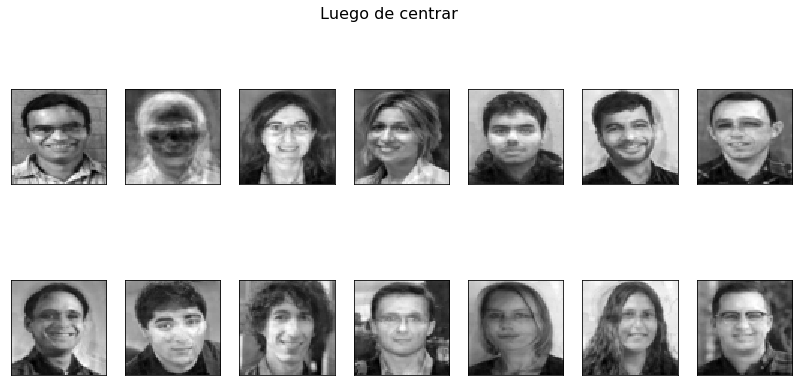

In [10]:
# Normalizar imagenes
img_processed = matriz_img.copy()
plot_img(matriz_img,title='Antes de la normalizacion')

media = img_processed.mean(axis=1)
std = img_processed.std(axis=1)

for i in range(M):
    img_processed[:,i] = (img_processed[:,i] - img_processed[:,i].mean()) * std/img_processed[:,i].std() + media

plot_img(img_processed, title='Luego de normalizacion')

#Centrar imagenes, para esto utilizamos la media
media_norm = img_processed.mean(axis=1)
for i in range(M):
    img_processed[:,1] = img_processed[:,1] - media_norm
    
plot_img(img_processed, title='Luego de centrar')

C:\Users\jarroyo\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


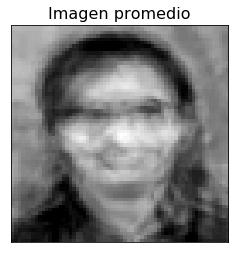

In [11]:
# Rostro medio
ax, fig = plt.subplots()
plt.imshow(skimage.img_as_ubyte(media_norm.reshape((icol,irow))), cmap='gray')
plt.title('Imagen promedio', fontsize = 16)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

#### Calculando eigenfaces

In [12]:
# Matriz de covarianza
A = img_processed.copy()
cov_matrix = np.matmul(A.T,A)
print('Dimension de la matriz de covarianza: {}\n'.format(cov_matrix.shape))


Dimension de la matriz de covarianza: (14, 14)



In [13]:
# Calculando eigenvectors y eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Dimencion de los vectores propios: {}'.format(eigenvectors.shape))
for i in range(10):
    print('Eigenvector[{}] = {}'.format(i,np.linalg.norm(eigenvectors[:,i])))

Dimencion de los vectores propios: (14, 14)
Eigenvector[0] = 0.9999999999999998
Eigenvector[1] = 0.9999999999999999
Eigenvector[2] = 1.0
Eigenvector[3] = 1.0
Eigenvector[4] = 1.0
Eigenvector[5] = 0.9999999999999999
Eigenvector[6] = 0.9999999999999999
Eigenvector[7] = 1.0
Eigenvector[8] = 1.0
Eigenvector[9] = 1.0


In [14]:
# Eliminar eigenvectors con eigenvalue = 0
threshold = 1e-4
n = sum(eigenvalues > threshold)
d = np.zeros(n)
print('d: {}'.format(d))
print('forma vectores propios: {}'.format(eigenvectors.shape[0]))
v = np.zeros((eigenvectors.shape[0],n))
print('forma de v: {}'.format(v.shape))
j = 0
print('Cantidad de valores propios: {}'.format(len(eigenvalues)))
print('Cantidad de vectores propios: {}'.format(eigenvectors.shape))
for i in range(len(eigenvalues)):
    if eigenvalues[i] > threshold:
        d[j] = eigenvalues[i] #Si el valor propio es menor a 0.0001 entonces 
        v[:,j] = eigenvectors[:,i]
        j += 1
    else:
        print('Eliminando eigenvalues[{}] and eigenvectors[{}] (eigenvalues[{}] = {})'.format(i,i,i,eigenvalues[i]))
        print('Array d: {}'.format(d.shape))
        print('Array v: {}'.format(v))

d: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
forma vectores propios: 14
forma de v: (14, 13)
Cantidad de valores propios: 14
Cantidad de vectores propios: (14, 14)
Eliminando eigenvalues[5] and eigenvectors[5] (eigenvalues[5] = 3.7626114509775186e-12)
Array d: (13,)
Array v: [[ 0.06992021  0.1242878   0.54967133 -0.03357482  0.29887128  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.96355493 -0.00477939 -0.00842884 -0.00508765 -0.00161995  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.07661707  0.31855964 -0.15216909 -0.36479955 -0.06387444  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.06511446  0.39161361  0.3985499   0.37639354  0.03547502  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.07750181 -0.31583912 -0.0449721  -0.19619346  0.0216751   0.
   0.          0.          0.          0.          0.          0.
   0.

In [21]:
#Ordenando el resultado de los vectores propios resultantes
v = v[:,np.argsort(d)] #Entrega el orden de los vectores propios de acuerdo al orden de los valores propios
d = np.sort(d)
print('Vector propio[0] = {} Normalizado\n'.format(np.linalg.norm(v[:,0])))

Vector propio[0] = 1.0 Normalizado



In [17]:
print('Calculando los {} mayores vectores propios y valores propios de C = AA\ (Matriz de covarianza)...'.format(n))
u = np.matmul(A,v)
print('Dimension de u: {}'.format(u.shape))
#Normalizar
for i in range(n):
    print('Vector propio[{}]: {}'.format(i,np.linalg.norm(u[:,i])))

Calculando los 13 mayores vectores propios y valores propios de C = AA\ (Matriz de covarianza)...
Dimension de u: (4096, 13)
Vector propio[0]: 7.866536242072397
Vector propio[1]: 8.388666950208428
Vector propio[2]: 8.976383450655876
Vector propio[3]: 10.057172964889126
Vector propio[4]: 11.43673384267039
Vector propio[5]: 12.814649651633104
Vector propio[6]: 13.598376813807052
Vector propio[7]: 14.495356972560561
Vector propio[8]: 18.284118395301356
Vector propio[9]: 20.68875957164339
Vector propio[10]: 25.03151863020443
Vector propio[11]: 33.704869465798694
Vector propio[12]: 382.0537734572256


In [18]:
u = normalize(u, axis=0)
for i in range(n):
    print('Vector propio normalizado[{}]: {}'.format(i,np.linalg.norm(u[:,i])))

Vector propio normalizado[0]: 1.0000000000000002
Vector propio normalizado[1]: 0.9999999999999996
Vector propio normalizado[2]: 1.0000000000000002
Vector propio normalizado[3]: 0.9999999999999996
Vector propio normalizado[4]: 1.000000000000001
Vector propio normalizado[5]: 1.0000000000000007
Vector propio normalizado[6]: 1.0
Vector propio normalizado[7]: 0.9999999999999989
Vector propio normalizado[8]: 1.0000000000000002
Vector propio normalizado[9]: 1.0000000000000004
Vector propio normalizado[10]: 1.0
Vector propio normalizado[11]: 0.9999999999999991
Vector propio normalizado[12]: 0.9999999999999993


13


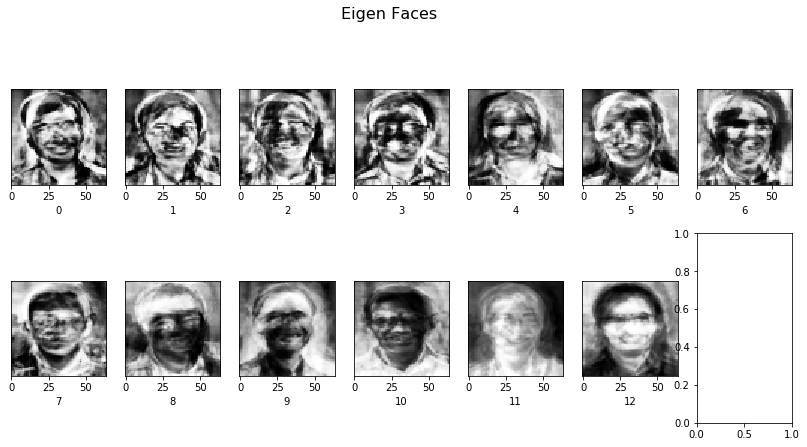

In [37]:
### Showing the eigenfaces
print(u.shape[1])
eigen_faces = np.ndarray((icol*irow, u.shape[1]))
for i in range(u.shape[1]):
    eigen_faces[:,i] = exposure.equalize_hist(u[:,i], nbins = 256)
eigen_faces = skimage.img_as_ubyte(eigen_faces)
plot_img(eigen_faces, title='Eigen Faces')